In [1]:
# Imports
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Custom functions
import dataload
import transform

In [2]:
# Settings

all_names = [
    'ADGU101504',
    'ALUR012904',
    'BECA011405',
    'BRCA062405',
    'BRLO041102',
    'BTOL083105',
    'BTOL090105',
    'CAPO092605',
    'CRCA020205',
    'ESCI031905',
    'TAGO061203']

path_rec = "ssdata/register/"
rec_postamble = ".rec"

path_marks = "ssdata/label/marks/"
marks_preamble = "FixedSS_"
marks_postamble = ".txt"

path_states = "ssdata/label/states/"
states_preamble = "StagesOnly_"
states_postamble = ".txt"

params = {
    'channel': 1,             # Channel to be used
    'dur_epoch': 30,          # Time of window page [s]
    'n2_val': 3,              # N2 state coding value
    'window': 1,              # Length of window for spectrogram, in [s]
    'context': 1,             # Additional context so we can compute spectrum at the borders of the window, in [s]
    'mark_smooth': 1          # Number of samples to average at the center to get the segment central mark.
    # 'dur_min_ss': 0.3,      # Min SS duration [s]
    # 'dur_max_ss': 3.0       # Max SS duration [s]
}

In [3]:
# Read first register
signal_list = []
marks_list = []
states_list = []
for i in range(1):
    # Read EEG Signal
    path_edf_file = path_rec + all_names[i] + rec_postamble
    signal, fs = dataload.read_eeg(path_edf_file, params['channel'])
    signal_list.append(signal)
    # Read Expert marks
    path_marks_file = path_marks + marks_preamble + all_names[i] + marks_postamble
    marks = dataload.read_marks(path_marks_file, params['channel'])
    marks_list.append(marks)
    # Read states
    path_states_file = path_states + states_preamble + all_names[i] + states_postamble
    states = dataload.read_states(path_states_file)
    states_list.append(states)    
params['fs'] = fs           # Save sampling frequency [Hz]

print(len(signal_list), ' EEG signals have been read.')
print(len(marks_list), ' sleep spindle marks files have been read.')
print(len(states_list), ' state annotations files have been read.')
print('Sampling Frequency: ', fs, 'Hz')

1  EEG signals have been read.
1  sleep spindle marks files have been read.
1  state annotations files have been read.
Sampling Frequency:  200 Hz


Chosen epoch: 28


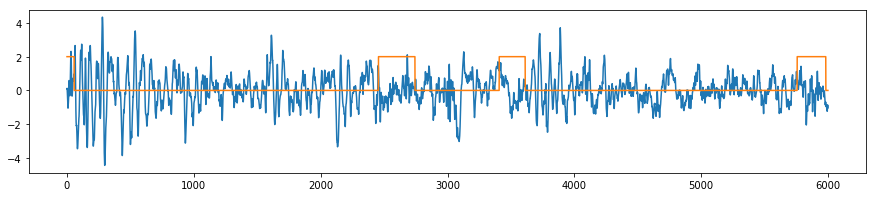

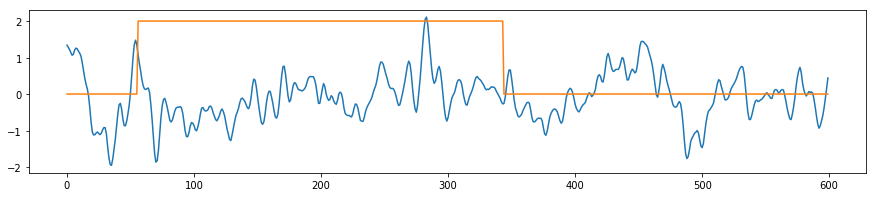

In [20]:
# first n2 epoch
signal = signal_list[0]
states = states_list[0]
marks = marks_list[0]
marks = transform.inter2seq(marks, 0, len(signal) - 1)

useful = np.where(states == params["n2_val"])
epoch = useful[0][0]
print("Chosen epoch: "+str(epoch))

# get segment
sample_start = epoch * params['dur_epoch'] * params['fs']
sample_end = (epoch + 1) * params['dur_epoch'] * params['fs']
segment_signal = signal[sample_start:sample_end]
segment_marks = marks[sample_start:sample_end]

# Normalize signal
segment_signal = (segment_signal - np.mean(segment_signal)) / np.std(segment_signal)

# Show segment
plt.figure(figsize=(15, 3))
plt.plot(segment_signal)
plt.plot(2*segment_marks)
plt.show()

# Mini segment
mini_signal = segment_signal[2400:3000]
mini_marks = segment_marks[2400:3000]

# Plot mini segment
plt.figure(figsize=(15, 3))
plt.plot(mini_signal)
plt.plot(2*mini_marks)
plt.show()

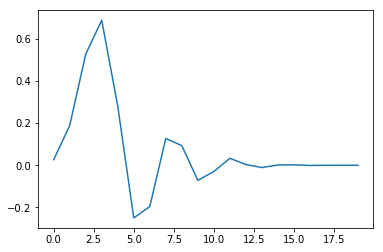

In [37]:
# Get CWT
from scipy import signal

plt.plot(signal.daub(10)) # can have values from 1 to 33.
